### This notebook looks at the convergence check cases. Uses core of Pressure

0.005922129350122753
0.008201946345024936


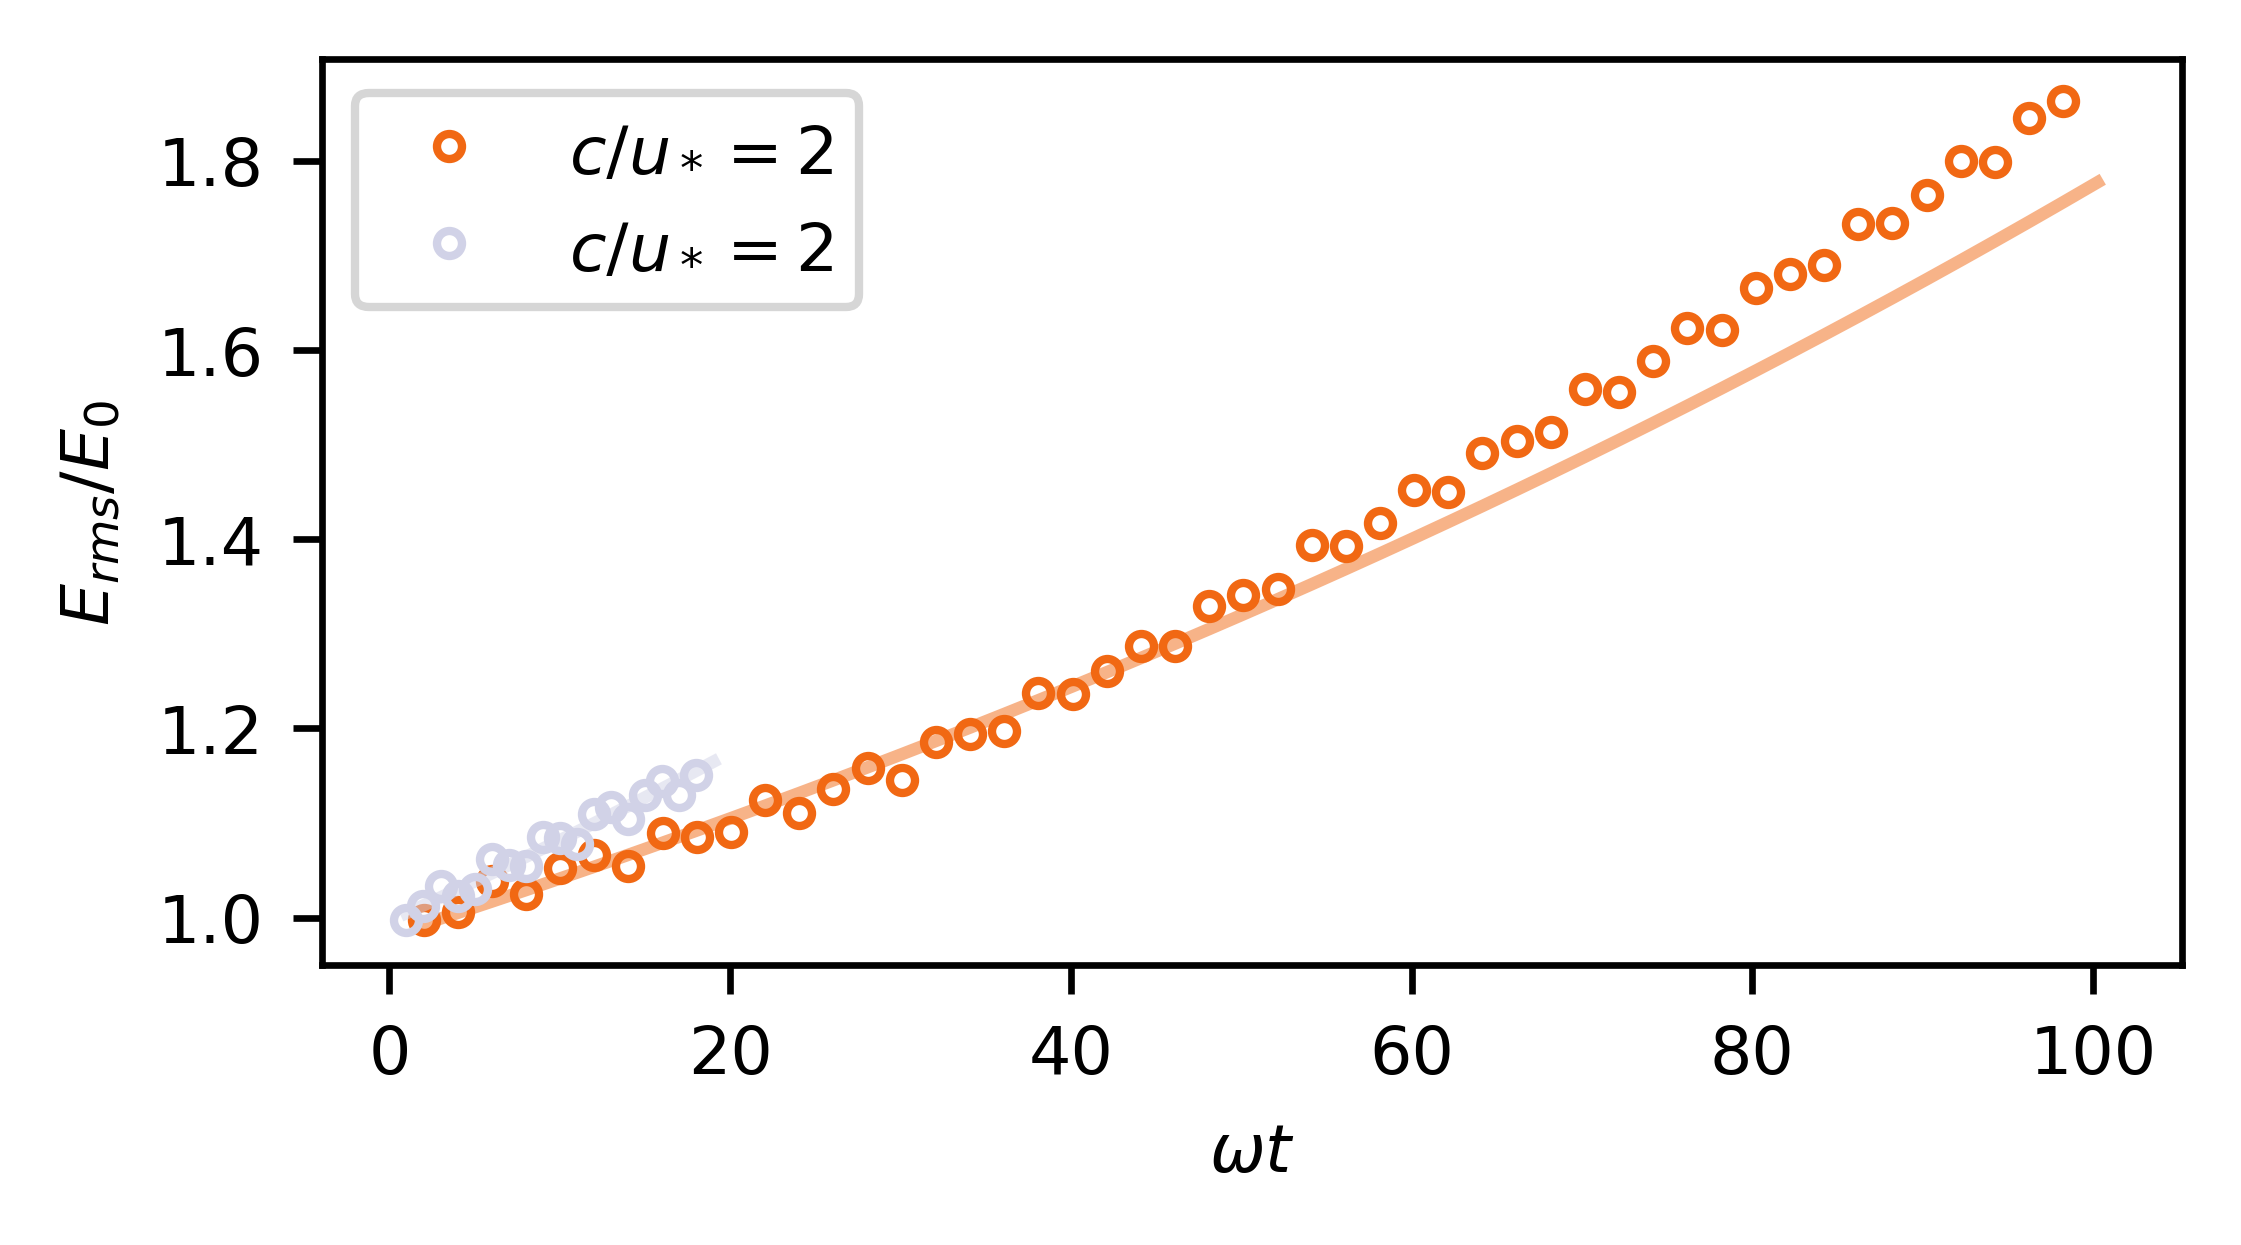

In [169]:
""" FIGURE: Wave growth plot, after all the E_rms have been computed. """
fig = plt.figure(figsize=[4,2]); ax = plt.gca()

def plotE(case, skip=1):
    plt.plot(np.array(case.phase['t'][0:-1:skip])*case.wave.omega, case.E_rms_raw[0:-1:skip]/case.E_rms[0], marker=case.marker, mfc='none',
             label=r'$c/u_*=%.0f$' %(case.wave.c/case.ustar), lw=0, markersize=3, color=case.cc, alpha = 1) 
#     plt.plot(np.array(case.phase['t'])*case.wave.omega, case.Ep/case.Ep[0], color=case.cc, marker = case.marker, mfc='none',
#              markeredgewidth=1, lw=0, markersize=3)

""" Fit an exponential """
def fit_exponential(case):
    case.wa, wb = np.polyfit(np.array(case.phase['t'])[0:25]*case.wave.omega, np.log(case.E_rms_raw/case.E_rms[0])[0:25], 1)
    plt.plot(np.array(case.phase['t'])*case.wave.omega, np.exp(case.wa*np.array(case.phase['t'])*case.wave.omega+wb), color=case.cc, alpha = 0.5)
    print(case.wa)

# for case in (case1,case2,case3,case7,case8,case9,case10,case11,case12,case4,case5,case6):
#     if case == case7 or case==case8 or case==case9 or case==case10 or case==case12:
#         plotE(case,skip=10)
#     else:
#         plotE(case,skip=1)
#     fit_exponential(case)

# Only plot one slope
# (case1.marker, case2.marker, case3.marker) = ('o','s','^')
case_con1.cc = cmap(1)
case_con1.marker = 'o'
for case in (case1,case_con1):
    plotE(case)
    fit_exponential(case)

# ax.text(0.4, 0.9, r'$\bar{\beta} = %.3f$' % case1.wa, ha='center', va='center', rotation=0., fontsize=6, 
#         color=plt.get_cmap('tab20c')(4), transform=ax.transAxes)
# ax.text(0.87, 0.48, r'$\bar{\beta} = %.3f$' % case2.wa, ha='center', va='center', rotation=0., fontsize=6, 
#         color=plt.get_cmap('tab20c')(5), transform=ax.transAxes)

plt.xlabel(r'$\omega t$'); plt.ylabel(r'$E_{rms}/E_0$')
# plt.ylim([0.9,1.4]); plt.xlim([10,50])
plt.legend(loc='upper left')
fig.savefig('figures/wave_growth.pdf', bbox_inches='tight', pad_inches=0.1)